# Data Visualization and Exploration

We look at the various questions such as:
1. The Most successful movies at the Academy
2. The Biggest Surprises
3. The Biggest Dissapointments


In [13]:
# import necessary libraries
import pandas as pd
import collections
import numpy as np
import requests
import wikipedia
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.request import urlopen
from scrapy import selector
import datetime as dt
import pickle
from skimage import io
from IPython.display import clear_output
%matplotlib inline

# Data Visualization: The Academy Awards

In [25]:
#OSCARS information
genre_dict = pickle.load(open("my_data_4/genre_dict","rb"))
all_categories = pickle.load(open("my_data_4/all_categories","rb")) 
major_categories = pickle.load(open("my_data_4/major_categories","rb")) 
minor_categories = pickle.load(open("my_data_4/minor_categories","rb")) 

df_oscars_wide = pd.read_csv('my_data_4/df_oscars_wide.csv', index_col=[0])
df_oscars_long = pd.read_csv('my_data_4/df_oscars_long.csv', index_col=[0])
df_individual_long = pd.read_csv('my_data_4/df_individual_long.csv', index_col=[0])

# Movies information
df_movies = pd.read_csv('my_data_4/df_movies.csv', index_col=[0])
df_movies_derived = pd.read_csv('my_data_4/df_movies_derived.csv', index_col=[0])
df_movies_genres = pd.read_csv('my_data_4/df_movies_genres.csv', index_col=[0])

#Oscar scores and counts
df_movies_oscars_pre_post_score = pd.read_csv('my_data_4/df_movies_oscars_pre_post_score.csv', index_col=[0])
df_movies_oscars_precount = pd.read_csv('my_data_4/df_movies_oscars_precount.csv', index_col=[0])
df_movies_oscars_postcount = pd.read_csv('my_data_4/df_movies_oscars_postcount.csv', index_col=[0])



movie_dict = pickle.load(open("my_data_4/movie_dict","rb"))

In [26]:
df = df_movies_oscars_pre_post_score
print(df.shape)
df['oscar_surprise'] = df.postscore - df.prescore
df.sort_values(by='oscar_surprise', ascending=False).head(10)


(4770, 5)


,imdbID,title,year,prescore,postscore,oscar_surprise
873,tt0073486,one flew over the cuckoo's nest,1975,0.6,25.20,24.60
1262,tt0079417,kramer vs. kramer,1979,1.0,24.20,23.20
4714,tt0067116,the french connection,1971,0.2,20.25,20.05
479,tt0102926,the silence of the lambs,1991,5.2,24.00,18.80
2187,tt0055614,west side story,1961,0.6,19.20,18.60
398,tt0268978,a beautiful mind,2001,1.0,19.20,18.20
1246,tt0086425,terms of endearment,1983,6.8,23.00,16.20
750,tt0099348,dances with wolves,1990,0.2,15.60,15.40
454,tt0138097,shakespeare in love,1998,5.0,20.40,15.40
4696,tt1655442,the artist,2011,0.0,15.35,15.35


# The List of Winners and Losers

1. The most successful movies at the Academy of all time
2. The biggest surprises of all time - the underdog winners
3. The biggest dissapointments
4. The best films according to Academy and IMDB
5. When the Academy disagreed with the public


### The Most Successful Academy  Awards Since 1960s

In [27]:
df = df_movies_oscars_pre_post_score
print(df.shape)
df.sort_values(by='postscore', ascending=False).head(10)

(4770, 6)


,imdbID,title,year,prescore,postscore,oscar_surprise
873,tt0073486,one flew over the cuckoo's nest,1975,0.6,25.20,24.60
1262,tt0079417,kramer vs. kramer,1979,1.0,24.20,23.20
479,tt0102926,the silence of the lambs,1991,5.2,24.00,18.80
1246,tt0086425,terms of endearment,1983,6.8,23.00,16.20
267,tt1504320,the king's speech,2010,5.6,20.45,14.85
454,tt0138097,shakespeare in love,1998,5.0,20.40,15.40
2698,tt0060665,a man for all seasons,1966,11.6,20.40,8.80
618,tt0405159,million dollar baby,2004,20.8,20.30,-0.50
4714,tt0067116,the french connection,1971,0.2,20.25,20.05
131,tt0109830,forrest gump,1994,8.3,20.20,11.90


### Biggest Surprises

In [28]:
df = df_movies_oscars_pre_post_score
print(df.shape)
df['oscar_surprise'] = df.postscore/(1+df.prescore)
df.sort_values(by='oscar_surprise', ascending=False).head(10)

(4770, 6)


,imdbID,title,year,prescore,postscore,oscar_surprise
4714,tt0067116,the french connection,1971,0.200000,20.25,16.875000
873,tt0073486,one flew over the cuckoo's nest,1975,0.600000,25.20,15.750000
4696,tt1655442,the artist,2011,0.000000,15.35,15.350000
1074,tt0076245,julia,1977,0.000000,14.65,14.650000
1740,tt4975722,moonlight,2016,0.111111,15.40,13.860000
297,tt1010048,slumdog millionaire,2008,0.100000,15.00,13.636364
750,tt0099348,dances with wolves,1990,0.200000,15.60,13.000000
1262,tt0079417,kramer vs. kramer,1979,1.000000,24.20,12.100000
2187,tt0055614,west side story,1961,0.600000,19.20,12.000000
2379,tt0075686,annie hall,1977,0.200000,14.20,11.833333


### The Biggest Dissapointments

In [7]:
df = df_movies_oscars_pre_post_score
print(df.shape)
df['oscar_surprise'] = df.postscore - df.prescore
df.sort_values(by='oscar_surprise', ascending=True).query("postscore < 1").head(10)

(4770, 6)


,imdbID,title,year,prescore,postscore,oscar_surprise
775,tt6294822,the post,2017,45.747222,0.311111,-45.436111
3563,tt0097965,new york stories,1989,38.290909,0.000000,-38.290909
2920,tt0112883,don juan demarco,1994,37.900000,0.000000,-37.900000
4746,tt0112883,don juan demarco,1995,37.900000,0.000000,-37.900000
2640,tt0075648,airport '77,1977,37.600000,0.000000,-37.600000
2050,tt1341188,how do you know,2010,37.500000,0.000000,-37.500000
2842,tt0875034,nine,2009,37.700000,0.250000,-37.450000
4368,tt0074777,the last tycoon,1976,37.200000,0.000000,-37.200000
1708,tt0418689,flags of our fathers,2006,37.100000,0.000000,-37.100000
1307,tt0343737,the good shepherd,2006,36.900000,0.000000,-36.900000


### The Best Film of all times

In [11]:
df = pd.merge(df_movies_oscars_pre_post_score, df_movies)
df1 = df.sort_values(by="imdb_rating", ascending=False)
df1.head()

df2 = df.sort_values(by="postscore", ascending=False)
df2.head()
N = 2000
df3 = pd.merge(df1.head(N),df2.head(N)).query("postscore > 12")
df3[['imdbID','title','year','postscore', 'imdb_rating']].head(10).sort_values(by='imdb_rating', ascending=False)


,imdbID,title,year,postscore,imdb_rating
1,tt0068646,the godfather,1972,14.533333,9.2
3,tt0167260,the lord of the rings: the return of the king,2003,15.000000,8.9
5,tt0108052,schindler's list,1993,15.400000,8.9
8,tt0109830,forrest gump,1994,20.200000,8.8
10,tt0073486,one flew over the cuckoo's nest,1975,25.200000,8.7
15,tt0102926,the silence of the lambs,1991,24.000000,8.6
18,tt0407887,the departed,2006,15.200000,8.5
21,tt0253474,the pianist,2002,15.200000,8.5
53,tt0086879,amadeus,1984,19.000000,8.3
62,tt0169547,american beauty,1999,20.200000,8.3


### When Academy and People disagreed
Highest Rated films on IMDB that did poorly at the Oscars

In [305]:
df = pd.merge(df_movies_oscars_pre_post_score, df_movies)
df1 = df.sort_values(by="imdb_rating", ascending=False)
df1.head()

df2 = df.sort_values(by="postscore", ascending=True).query("n_votes > 10000")
df2.head()

N = 3000
df3 = pd.merge(df1.head(N),df2.head(N))
df3[['imdbID','title','year','postscore', 'imdb_rating']].head(10)



,imdbID,title,year,postscore,imdb_rating
0,tt0071562,the godfather: part ii,1974,0.0,9.0
1,tt1190634,the boys,1962,0.0,8.8
2,tt0475784,westworld,1973,0.0,8.8
3,tt0060196,"the good, the bad and the ugly",1966,0.0,8.8
4,tt0133093,the matrix,1999,0.0,8.7
5,tt0080684,the empire strikes back,1980,0.0,8.7
6,tt0080684,star wars: episode v - the empire strikes back,1980,0.0,8.7
7,tt5675620,the punisher,1989,0.0,8.6
8,tt0114369,se7en,1995,0.0,8.6
9,tt0047478,seven,1995,0.0,8.6


In [12]:
df_movies_oscars_pre_post_score[df_movies_oscars_pre_post_score.title.str.contains('godfather')]

,imdbID,title,year,prescore,postscore,oscar_surprise
461,tt0068646,the godfather,1972,6.0,14.533333,8.533333
1029,tt0099674,the godfather: part iii,1990,27.5,0.000000,-27.500000
1032,tt0099674,the godfather part iii,1990,27.5,0.600000,-26.900000
1875,tt0071562,the godfather: part ii,1974,5.6,0.000000,-5.600000
4692,tt0071562,the godfather part ii,1974,5.6,18.400000,12.800000


In [23]:
df_movies_oscars_pre_post_score.shape

(4770, 6)

In [22]:
df1 = df_movies[df_movies_genres.com==1]
df2 = df_movies_oscars_pre_post_score[df_movies_genres.com==1]
df2.head()

/Users/ranitsengupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

## Best Picture Genres

### Conditional Probability of Genres

What is the probability a movie is a comedy given that it is a drama

In [128]:
def conditional_prob(prob_of, given, data):
    """prob_of{'comedy':1, 'romance':0} given{'dra':1} will return 
    probability of comedy but not romance given that it is a drama
    """
    for key,value in given.items():
        data = data[data[key] == value]
    L1 = len(data)
    for key,value in prob_of.items():
        data = data[data[key] == value]
    return len(data)/L1
    
    # return len(data[data[prob_of.key()] == prob_of.value()])/len(data)

In [144]:
### BAYE's theorem on Genre

df_movies_genres = pd.read_csv('my_data_4/df_movies_genres.csv')
df_movies_genres.head()

prob_of = {'com':1}
given = {'dra':1}
p_com_given_dra = conditional_prob(prob_of, given, df_movies_genres)
print('p_comedy_given_drama:',p_com_given_dra)

prob_of = {'com':1}
given = {}
p_com = conditional_prob(prob_of, given, df_movies_genres)
print('p_comedy:', p_com)

prob_of = {'dra':1}
given = {}
p_dra = conditional_prob(prob_of, given, df_movies_genres)
print('p_drama:', p_dra)

prob_of = {'com':1, 'dra':1}
given = {}
p_com_and_dra = conditional_prob(prob_of, given, df_movies_genres)
print('p_comedy_and_drama:',p_com_and_dra)

print(p_com_and_dra/p_dra)
print('=?')
print(p_com_given_dra)


prob_of = {'dra':1}
given = {'com':1}
p_dra_given_com = p_com_and_dra/p_com
print('\np_dra_given_com')
print(conditional_prob(prob_of, given, df_movies_genres))
print(p_dra_given_com)

print('\nProb of drama given comedy is bigger because drama is a much bigger set')


p_comedy_given_drama: 0.28354632587859424
p_comedy: 0.3987421383647799
p_drama: 0.5249475890985325
p_comedy_and_drama: 0.1488469601677149
0.2835463258785943
=?
0.28354632587859424

p_dra_given_com
0.3732912723449001
0.3732912723449001

Prob of drama given comedy is bigger because drama is a much bigger set


113
113


([<matplotlib.axis.YTick at 0x1c2874b3d0>,
 <a list of 9 Text yticklabel objects>)

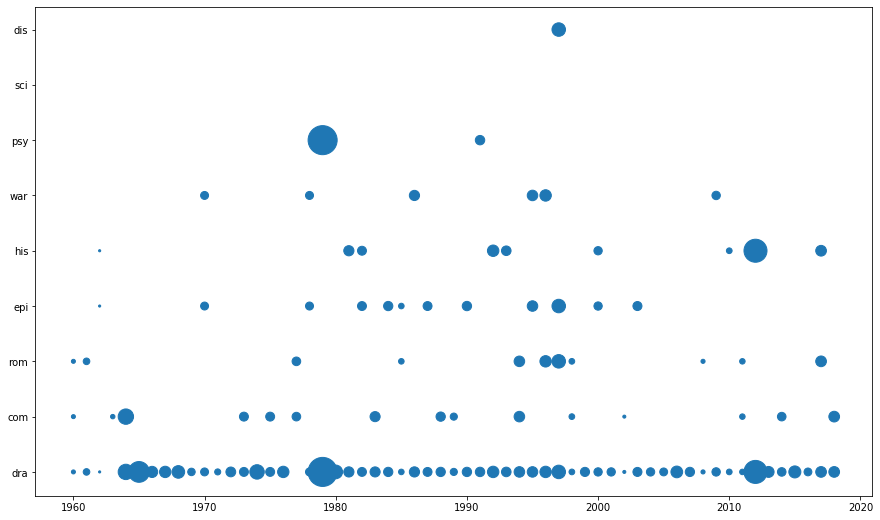

In [77]:
df = df_oscars_long[(df_oscars_long.category == 'picture') 
                    & (df_oscars_long.result == 'W')
                    & (df_oscars_long.year >= 1960)]

main_genres = ['dra','com', 'rom','epi','his', 'war', 'psy','sci','dis']
df.reset_index(inplace=True)
_years = []
_genres = []
_size = []
for row in df.iterrows():
    idx = row[0]
    this_genres = movie_dict[row[1].film, row[1].year]['genre']
    budget = df_movies.loc[idx,'budget_adjusted']
    for genre in this_genres:
        if genre not in main_genres:
            continue
        _years.append(row[1].year)
        _genres.append(main_genres.index(genre))
        _size.append(budget)
print(len(_years))
print(len(_genres))

plt.figure(figsize=(15,9))
plt.scatter(_years,_genres,s = _size) 
plt.yticks(range(0,len(main_genres)),main_genres)
        
        

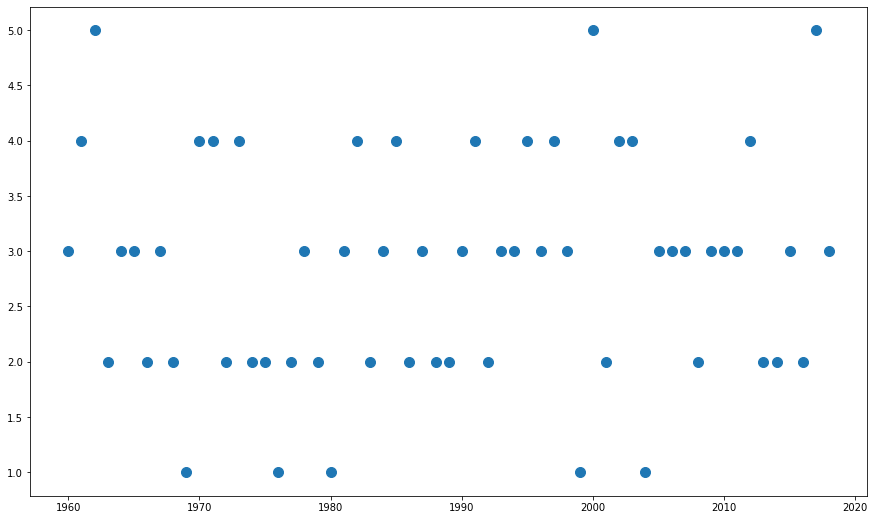

In [89]:
df = df_oscars_long[(df_oscars_long.category == 'picture') 
                    & (df_oscars_long.result == 'W')
                    & (df_oscars_long.year >= 1960)]

main_genres = ['dra','com', 'rom','epi','his', 'war', 'psy','sci','dis']
df.reset_index(inplace=True)
_years = []
_genre_size = []
_size = []
for row in df.iterrows():
    idx = row[0]
    this_genres = movie_dict[row[1].film, row[1].year]['genre']
    _genre_size.append(len(this_genres))
    _years.append(row[1].year)


plt.figure(figsize=(15,9))
plt.scatter(_years,_genre_size, s = 100) 
# plt.yticks(range(0,len(main_genres)),main_genres)
        
        

## Best Actor Genres

two women missing from dictionary!
100
100


([<matplotlib.axis.YTick at 0x1c27bdcd50>,
 <a list of 9 Text yticklabel objects>)

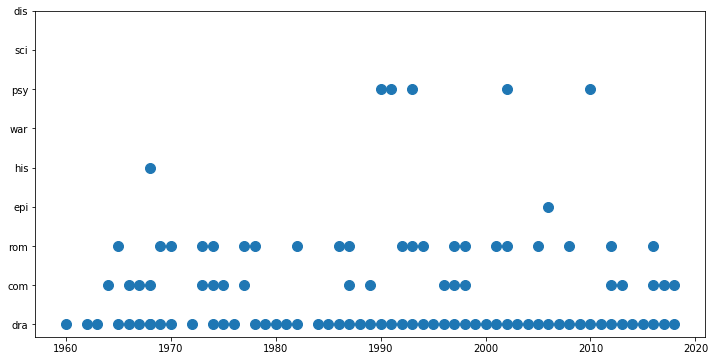

In [57]:
df = df_oscars_long[(df_oscars_long.category == 'actress') 
                    & (df_oscars_long.result == 'W')
                    & (df_oscars_long.year >= 1960)]

main_genres = ['dra','com', 'rom','epi','his', 'war', 'psy','sci','dis']
df.reset_index(inplace=True)
_years = []
_genres = []
for row in df.iterrows():
    # print(row[1].film,row[1].year )
    if (row[1].film, row[1].year) not in movie_dict:
        print(f'{row[1].film} missing from dictionary!')
        continue
    if len(movie_dict[row[1].film, row[1].year])==0:
        print(f'{row[1].film} missing from dictionary!')
        continue
    if 'genre' not in movie_dict[row[1].film, row[1].year]:
        print(f'{row[1].film} missing from dictionary!')
        continue
        
    this_genres = movie_dict[row[1].film, row[1].year]['genre']
    for genre in this_genres:
        if genre not in main_genres:
            continue
        _years.append(row[1].year)
        _genres.append(main_genres.index(genre))
print(len(_years))
print(len(_genres))

plt.figure(figsize=(12,6))
plt.scatter(_years,_genres,s = 100) 
plt.yticks(range(0,len(main_genres)),main_genres)
        
        

In [55]:
('two women',1961) not in movie_dict
movie_dict[('two women',1961)]

{'imdbID': 'tt0054749',
 'imdb_rating': 7.8,
 'n_votes': 8363,
 'title': 'two women'}